<font size=6> <b> SMU Lab Three - MSDS7331 - Machine Learning-1 </b> </font>

<font size=5> <b> Summer 2020 Group - Sachin, Ikenna, Edgar, Dustin </b></font> 




<img src="https://github.com/sachinac/ML7331/blob/master/data/maxresdefault.png?raw=true"> 

<p align="center"><font size=5> <b> Movie Recommender System  </b></font> </p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1">Import Libraries</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-3">Business Understanding</a></span></li><li><span><a href="#Data-Understanding-1---First-Impressions" data-toc-modified-id="Data-Understanding-1---First-Impressions-4">Data Understanding 1 - First Impressions</a></span><ul class="toc-item"><li><span><a href="#Downloading-the-data:" data-toc-modified-id="Downloading-the-data:-4.1">Downloading the data:</a></span></li><li><span><a href="#Movie-Credits" data-toc-modified-id="Movie-Credits-4.2">Movie Credits</a></span></li><li><span><a href="#Movie-Keywords" data-toc-modified-id="Movie-Keywords-4.3">Movie Keywords</a></span></li><li><span><a href="#Movie-Metadata" data-toc-modified-id="Movie-Metadata-4.4">Movie Metadata</a></span></li><li><span><a href="#Movie-Ratings" data-toc-modified-id="Movie-Ratings-4.5">Movie Ratings</a></span></li></ul></li><li><span><a href="#Data-Understanding-2---Visualization" data-toc-modified-id="Data-Understanding-2---Visualization-5">Data Understanding 2 - Visualization</a></span><ul class="toc-item"><li><span><a href="#Top-10-Stats:" data-toc-modified-id="Top-10-Stats:-5.1">Top 10 Stats:</a></span></li></ul></li><li><span><a href="#Modeling-and-Evaluation-1" data-toc-modified-id="Modeling-and-Evaluation-1-6">Modeling and Evaluation 1</a></span><ul class="toc-item"><li><span><a href="#Basic-Explicit-Model-(user-item)" data-toc-modified-id="Basic-Explicit-Model-(user-item)-6.1">Basic Explicit Model (user-item)</a></span></li></ul></li><li><span><a href="#Modeling-and-Evaluation-2" data-toc-modified-id="Modeling-and-Evaluation-2-7">Modeling and Evaluation 2</a></span></li><li><span><a href="#Modeling-and-Evaluation-3" data-toc-modified-id="Modeling-and-Evaluation-3-8">Modeling and Evaluation 3</a></span></li><li><span><a href="#Modeling-and-Evaluation-4" data-toc-modified-id="Modeling-and-Evaluation-4-9">Modeling and Evaluation 4</a></span></li><li><span><a href="#Deployment" data-toc-modified-id="Deployment-10">Deployment</a></span></li><li><span><a href="#Exceptional-Work" data-toc-modified-id="Exceptional-Work-11">Exceptional Work</a></span></li><li><span><a href="#References" data-toc-modified-id="References-12">References</a></span></li></ul></div>

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import turicreate as tc
import ast
import wget
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from sklearn.preprocessing import MultiLabelBinarizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

timebreak = '\n\n----------------------------------------------------\nCell Processing Time'

# Introduction

<i> "A recommender system calculates and provides relevant content to the user based on knowledge of the user, content, and interactions between the user and the item." </i> - Practical Recommeder Systems by Kim Falk 

<b> What are recommender Systems ? </b>

Systems that are designed to predict user's interests and recommend product items that are likely interesting for them. These are most powerful system particularly for online retailers to boost sales. E-commerce and retail companies are leveraging power of data and boosting sales by implementing recommender systems on their websites. The use cases of these systems have been steadily increasing within the last few years.

Companies like Amazon, Netflix, Linkedin, and Pandora leverage recommender systems to help users discover new and relevant items (products, videos, jobs, music), creating a delightful user experience while driving incremental revenue. The purpose of recommender systems is to tempt/persuade customer to buy a product/service by providing relevant information that interest to them right at their fingretips.

Recommendations typically speed up searches and make it easier for users to access content they’re interested in, and surprise them with offers they would have never searched for.

What is more, companies are able to gain and retain customers by sending out emails with links to new offers that meet the recipients’ interests, or suggestions of films and TV shows that suit their profiles.The user starts to feel known and understood and is more likely to buy additional products or consume more content. By knowing what a user wants, the company gains competitive advantage and the threat of losing a customer to a competitor decreases.

Providing that added value to users by including recommendations in systems and products is appealing. Furthermore, it allows companies to position ahead of their competitors and eventually increase their earnings.

Various types of recommendations systems are depcited in below diagram.<br><br>

  <div class="image1" align="center">
  <img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2019/11/19121357/types-of-recommendation-systember.jpg" width="400" height="300" alt="Screen 1"/>
    <a href="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2019/11/19121357/types-of-recommendation-systember.jpg"> 
        Image Source </a>
  </div>
  

For this assignment we will focus on user based and item based system which are based on nearest neighbour.



# Business Understanding
%%html
<style>
div.image-gallery {
  display: block;
  background-color: #cccccc;
}

div.image-gallery img {
  display: block;
  float: left;
}

.clear {
  clear: both;
  height: 0;
  width: 0;
  font-size: 1px;
  line-height: 0;
}
</style>

In this notebook we aim to build movie recommendations system using Apple's <a href="https://apple.github.io/turicreate/docs/userguide/recommender/"> Turicreate </a> package.The system that we are going to build will go a but deeper than traditional grouplens movie ratings dataset.In this notebook, we will be utilizing the popular movies dataset comprised of 26 million movie ratings from the GroupLens website, but with additional augmented data from TMDB which provides details including more detailed movie metadata such as: cast, crew, budget, country, revenue, languages and plot keywords on approximately 45,000 movies released prior to August 2017.

We will explore various methods for recommending movies to users based on content based and collaborative filtering methods. <b> Because movie taste is highly subjective, it may prove difficult to measure the effectiveness of our algorithms, but we will capture Root Mean Square Errored (RMSE) to compare predicted vs actual ratings for items.</b> We will also look at precision and recall for per-user and per-item metrics, as well as calculating metrics in different ways such as by genre or country or origin.

Here is general overview movie recommender system.

In general recommendation systems consist of following components

<b>1) Candidate generation </b><br><br>
    Starts from potentially huge corpus to smaller subset of candidates. e.g Candidate generator in youtube reduces 
    billions of videos to hundred or thousands<br><br>
    
Following table shows two common candidate generation approaches.
    
<table>
  <tr>
    <th  align="left">Type </th>
    <th  align="left">Definition</th>
    <th  align="left">Example</th>
  </tr>
  <tr>
    <td>content-based filtering</td>
    <td>Uses similarity between items to recommend items similar to what the user likes.</td>
    <td>If user A watches two cute cat videos, then the system can recommend cute animal videos to that user.</td>
  </tr>
  <tr>
    <td>collaborative filtering</td>
    <td>Uses similarities between queries and items simultaneously to provide recommendations</td>
    <td>If user A is similar to user B, and user B likes video 1, then the system can recommend video 1 to user A (even if user A hasn’t seen any videos similar to video 1).</td>
  </tr>
</table>

    
<b> 2)  Scoring </b> <br> <br>
Next, another model scores and ranks the candidates in order to select the set of items (on the order of 10) to display to the user. <br><br>

<b>3) Re-Ranking</b><br><br>
Finally, the system must take into account additional constraints for the final ranking. For example, the system removes items that the user explicitly disliked or boosts the score of fresher content. Re-ranking can also help ensure diversity, freshness, and fairness<br><br>




   
<font size=4> <b> Content based filtering </b> </font>

Content-based filtering uses item features (movie-metadata) to recommend other items similar to what the user likes, based on their previous actions or explicit feedback. Movie dataset that we have obtained contains only ratings as explicit feedback. There are no other user's action data available in this dataset.

So this filter does not involve other users. It only recommends based on what particular user likes and recommends item with similar content. e.g If user A likes comedy and action movies and user B also likes comedy but never watched action movies,collborative filter will recommend action movies to user B based on common comedy movies and later it may turn out that User B also likes action movies and he gets more recommendations on this list. 

   


<table>
    <tr>
  <td>
    <img src="https://github.com/sachinac/ML7331/blob/master/data/content_based_filter.png?raw=true" alt="Snow" style="width:62%">
      <div align="center"> Content-Based Filter </div>
      <div align="center"> Source : Google Images </div>
    </td>
  <td>
    <img src="https://github.com/sachinac/ML7331/blob/master/data/collaborative_filter.png?raw=true" alt="Forest" style="width:50%" align="center">
      <div align="center"> Collaborative Filter </div>
      <div align="center"> Source : Google Images </div>
  </td>
</tr>
</table>


<font size=4> <b> Collaborative Filtering </b> </font>

There are two types of collaborative filtering exist: <br>

<b>User Based collaborative filtering </b><br>

This type of filter is based on users’ ratings, and it will recommend movies that user hasn't watched yet, but users similar to us have, and like. To determine whether two users are similar or not, this filter considers the movies both of them watched and how they rated them. By looking at the items in common, this type of algorithm  predicts the rating of a movie for a user who hasn’t watched it yet, based on the similar users’ rating.

One of the challenge for this type of filter to work accurately is that it requires user's ratings and in real sense not all users rate the movie they watched.Some of them never rate movie. That poses challege to build effective recommender.

<b> Item based collaborative filtering </b><br>
   
This is another type of recommendation method which looks for similar items based on items users have already liked or consumed.Item-based collaborative filtering is a model-based algorithm for making recommendations. In the algorithm, the similarities between different items in the dataset are calculated by using one of a number of similarity measures, and then these similarity values are used to predict ratings for user-item pairs not present in the dataset. 

<b>Similarity Measures</b>

There are a number of different mathematical formulations that can be used to calculate the similarity between two items. As can be seen in the formulae below, each formula includes terms summed over the set of common users U.

We could divide Item-base collaborative filtering in two sub tasks:
    
1.Calculate similarity among the items:
    
* Cosine-Based Similarity
* Correlation-Based Similarity
* Adjusted Cosine Similarity
* 1-Jaccard distance
    
2.Calculation of Prediction:
* Weighted Sum
* Regression
    
The difference between User-Based Collaborative Filtering and this method is that, in this case, we directly pre-calculate the similarity between the co-rated items, skipping K-neighborhood search

Typically, there are very popular items that users interact with a lot and others that they don’t, which comprise what is known as the <font size=4 color="blue">Long Tail</font>. Recommender systems usually work pretty well on popular items, although that’s probably not very interesting to users as they most likely already know about them. The items in the Long Tail are the most interesting ones, because they may not be considered by the user at all if they aren’t recommended.

<img src="https://github.com/sachinac/ML7331/blob/master/data/content_based_filter.png?raw=true" alt="Snow" style="width:62%">


# Data Understanding 1 - First Impressions


## Downloading the data:
Because the unzipped data is ~ 900mb, we've saved it in an AWS S3 bucket as a zip file.  We've added the movies data directory to our *.gitignore* file so it doesn't get picked up in github.  This chunk of code does the following:
* Check if the movie directory exists, create it if not, skip the step if so.  
* Checks files in the directory against expected files, if not found, download the zip file from AWS, extracts and deletes the downloaded zip file, then cleans up created variables.

In [2]:
%%time
movie_dir = './data/movies'
movie_zipfile = movie_dir + '/movies.zip'
expected_files = ['keywords.csv', 'credits.csv', 'ratings.csv', 'ratings_small.csv', 'links_small.csv', 'movies_metadata.csv', 'links.csv']
movie_data = 'https://ml7331.s3.us-east-2.amazonaws.com/3405_6663_bundle_archive.zip'

# If movie directory doesn't exist, create it
if not os.path.isdir(movie_dir):
    print('creating directory:', movie_dir)
    os.mkdir(movie_dir)

# If all expected files are not present, download a fresh copy of movie data:    
if not all(files in os.listdir(movie_dir) for files in expected_files):
    print('downloading files...')
    wget.download(movie_data, movie_zipfile)
    print('unzipping files...')
    with zipfile.ZipFile(movie_zipfile, 'r') as zip_ref:
        zip_ref.extractall(movie_dir)
    os.remove(movie_zipfile)
    
del movie_data, movie_zipfile, movie_dir, expected_files
print('Movie files are present!', timebreak)

Movie files are present! 

----------------------------------------------------
Cell Processing Time
CPU times: user 985 µs, sys: 161 µs, total: 1.15 ms
Wall time: 641 µs


In [3]:
%%time
# Read in datasets
#TODO: these should go in their own sections eventually
links = pd.read_csv('./data/movies/links.csv')
links_small = pd.read_csv('./data/movies/links_small.csv')

links_small

CPU times: user 23.3 ms, sys: 607 µs, total: 23.9 ms
Wall time: 28.4 ms


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


## Movie Credits

The credits dataset (found in /data/credits.csv) has a movie id column and provides two JSON objects stored as a string representing the crew and cast.  It uses single quotes for strings, except in cases where a single quote is used, these strings are wrapped in double quotes.  Well formed JSON expects strings to be wrapped in double quotes, so we'll write a little helper function using the *literal_eval* function from the Abstract Syntax Trees package.

After parsing them as literal into a list object, we can pick out **directors, producers and actors**, which we think will be most important in influencing recommendations.  We'll save these as list objects which we can then merge into our movies dataset.

We also discovered 44 duplicate entries in this file, which from a sample of random selections appear to be true duplicates and will be safely removed.

In [239]:
%%time

credits = pd.read_csv('./data/movies/credits.csv')

# Drop rows where both cast and crew are empty
credits = credits[~((credits['cast'].str.contains('\[\]')) & (credits['crew'].str.contains('\[\]')))]

def dedupe(df):
    dupes = len(df[df.duplicated(subset=['id'])])
    print('Removed', dupes, 'duplicate rows.\n')
    return df[~df.duplicated(subset=['id'])]

# Remove duplicates:
credits = dedupe(credits)

def get_credits(crew_json):
    crew = ast.literal_eval(crew_json.crew)
    cast = ast.literal_eval(crew_json.cast)
    directors = []
    producers = []
    actors = []
    for member in crew:
#        if member is np.nan:
#            member = '[]'
        if 'Director' in member['job'] and member['job'] is not np.nan:
            directors.append(member['name'])
        if 'Producer' in member['job'] and member['job'] is not np.nan:
            producers.append(member['name'])
    for actor in cast:
#        if actor is np.nan:
#            actor = '[]'
        if actor['name'] is not np.nan:
            actors.append(actor['name'])

    return  pd.Series([directors, producers, actors])

credits[['directors','producers','actors']] = credits.apply(get_credits, axis=1)

def make_dict(lst):
    if lst is np.nan:
        return np.nan
    else:
        return { i : 'name' for i in lst }
        #return {i:lst[i] for i in range(0, len(lst))}

credits['actors_dict'] = credits.actors.apply(make_dict)
credits['producers_dict'] = credits.producers.apply(make_dict)
credits['directors_dict'] = credits.directors.apply(make_dict)

print(credits.info(),timebreak)

credits


Removed 44 duplicate rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45011 entries, 0 to 45475
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cast            45011 non-null  object
 1   crew            45011 non-null  object
 2   id              45011 non-null  int64 
 3   directors       45011 non-null  object
 4   producers       45011 non-null  object
 5   actors          45011 non-null  object
 6   actors_dict     45011 non-null  object
 7   producers_dict  45011 non-null  object
 8   directors_dict  45011 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB
None 

----------------------------------------------------
Cell Processing Time
CPU times: user 40.6 s, sys: 127 ms, total: 40.7 s
Wall time: 40.8 s


,cast,crew,id,directors,producers,actors,actors_dict,producers_dict,directors_dict
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[John Lasseter, Ash Brannon, William Reeves, R...","[Bonnie Arnold, Ed Catmull, Ralph Guggenheim, ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","{'Tom Hanks': 'name', 'Tim Allen': 'name', 'Do...","{'Bonnie Arnold': 'name', 'Ed Catmull': 'name'...","{'John Lasseter': 'name', 'Ash Brannon': 'name..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[Joe Johnston, Thomas E. Ackerman]","[Larry J. Franco, Scott Kroopf, Ted Field, Rob...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","{'Robin Williams': 'name', 'Jonathan Hyde': 'n...","{'Larry J. Franco': 'name', 'Scott Kroopf': 'n...","{'Joe Johnston': 'name', 'Thomas E. Ackerman':..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,[Howard Deutch],[],"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","{'Walter Matthau': 'name', 'Jack Lemmon': 'nam...",{},{'Howard Deutch': 'name'}
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,[Forest Whitaker],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[Whitney Houston, Angela Bassett, Loretta Devi...","{'Whitney Houston': 'name', 'Angela Bassett': ...","{'Ronald Bass': 'name', 'Ezra Swerdlow': 'name...",{'Forest Whitaker': 'name'}
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[Elliot Davis, Charles Shyer]",[Nancy Meyers],"[Steve Martin, Diane Keaton, Martin Short, Kim...","{'Steve Martin': 'name', 'Diane Keaton': 'name...",{'Nancy Meyers': 'name'},"{'Elliot Davis': 'name', 'Charles Shyer': 'name'}"
...,...,...,...,...,...,...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,"[Hamid Nematollah, Babak Ardalan]",[Hamid Nematollah],"[Leila Hatami, Kourosh Tahami, Elham Korda]","{'Leila Hatami': 'name', 'Kourosh Tahami': 'na...",{'Hamid Nematollah': 'name'},"{'Hamid Nematollah': 'name', 'Babak Ardalan': ..."
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,[Lav Diaz],[],"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...","{'Angel Aquino': 'name', 'Perry Dizon': 'name'...",{},{'Lav Diaz': 'name'}
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,"[Mark L. Lester, João Fernandes]",[],"[Erika Eleniak, Adam Baldwin, Julie du Page, J...","{'Erika Eleniak': 'name', 'Adam Baldwin': 'nam...",{},"{'Mark L. Lester': 'name', 'João Fernandes': '..."
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,[Yakov Protazanov],[Joseph N. Ermolieff],"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...","{'Iwan Mosschuchin': 'name', 'Nathalie Lissenk...",{'Joseph N. Ermolieff': 'name'},{'Yakov Protazanov': 'name'}


## Movie Keywords

The keywords dataset (found in /data/keywords.csv) has a movie id column and again provides a JSON object stored as a string representing keywords which apply to each movie.  It uses single quotes for strings, except in cases where a single quote is used, these strings are wrapped in double quotes.  Well formed JSON expects strings to be wrapped in double quotes, so we'll utilize another helper function using the *literal_eval* function from the Abstract Syntax Trees package.

After parsing them as literal into a list object, and removing empty list objects, we'll save these **plot keywords** as list object which we can merge into our movies dataset.

There are 532 duplicate entries in this file which from a sample of random selections, again appear to be true duplicates and will be safely removed.

In [133]:
%%time

keywords = pd.read_csv('./data/movies/keywords.csv')

# Remove empty entries:
keywords = keywords[~keywords['keywords'].str.contains('\[\]')]

# Remove duplicates:
keywords = dedupe(keywords)

keywords['keyword_json'] = keywords['keywords'] 

# Breakout json into a list of names
def get_keywords(keyword_list):
    if keyword_list is np.nan:
        return np.nan
    kw = []
    klist = ast.literal_eval(keyword_list)
    for word in klist:
        kw.append(word['name'])
    return kw

keywords['keywords'] = keywords.keyword_json.apply(get_keywords)

print(keywords.info(),timebreak)

keywords

Removed 532 duplicate rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31092 entries, 0 to 46415
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            31092 non-null  int64 
 1   keywords      31092 non-null  object
 2   keyword_json  31092 non-null  object
dtypes: int64(1), object(2)
memory usage: 971.6+ KB
None 

----------------------------------------------------
Cell Processing Time
CPU times: user 1.42 s, sys: 29.7 ms, total: 1.45 s
Wall time: 1.45 s


,id,keywords,keyword_json
0,862,"[jealousy, toy, boy, friendship, friends, riva...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[board game, disappearance, based on children'...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[fishing, best friend, duringcreditsstinger, o...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[based on novel, interracial relationship, sin...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[baby, midlife crisis, confidence, aging, daug...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...
46409,84419,"[revenge, murder, serial killer, new york city...","[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."
46410,390959,[blair witch],"[{'id': 224180, 'name': 'blair witch'}]"
46411,289923,"[witch, mythology, legend, serial killer, mock...","[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n..."
46414,439050,[tragic love],"[{'id': 10703, 'name': 'tragic love'}]"


## Movie Metadata



The movies dataset (found in /data/movies_metadata.csv) has a movie id column and provides a lot of usable and JSON objects storing various metadata about each movie.  This dataset also appears to contain approximately 30 duplicate records, and after examining a sample of random selections, they appear to be true duplicates and will be safely removed.

In this section we'll accomplish the following:  
* There are three movies with improper ID values (1997-08-20,2012-09-29,2014-01-01), these items all appear to have incorrect formatting, so we'll drop these in order to merge the keyword and credits datasets and prevent future problems.
* Merge directors, producers and actors from credits dataset
* Merge keywords from keywords dataset
* Clean up the movie collection by converting it to a string, as it appears to only contain one item per movie.
* Convert the JSON genres object into a list of genres

In [240]:
%%time
movies = pd.read_csv('./data/movies/movies_metadata.csv', low_memory=False)
print('Original Movies Shape: ', movies.shape, '\n')

# Remove the movies with erroneous data & convert ID to int:
movies = movies[~movies['id'].str.contains('-')]
movies['id'] = movies['id'].astype(int)

# Remove duplicates:
movies = dedupe(movies)

print('Movies Shape after dropping bad data: ', movies.shape, '\n')

# Add Keywords & Credits
movies = movies.merge(keywords, how='left', on='id')
print('Movies Shape after merging keywords: ', movies.shape, '\n')

movies = movies.merge(credits, how='left', on='id')
print('Movies Shape after merging credits: ', movies.shape, '\n')

movies = movies.drop(columns=['cast','crew','keyword_json'])

# Function to convert collection to a string
def get_collection(json):
    if pd.isnull(json):
        return np.nan
    else:
        return ast.literal_eval(json)['name']

movies['belongs_to_collection'] = movies.belongs_to_collection.apply(get_collection)

#preserve genres and spoken language dicts:
movies['genre_dict'] = movies['genres']
movies['spoken_languages_dict'] = movies['spoken_languages']
#We can re-use our get_keywords function here to get genres & spoken languages
movies['genres'] = movies.genres.apply(get_keywords)
movies['spoken_languages'] = movies.spoken_languages.apply(get_keywords)

print(movies.info(),timebreak)

movies


Original Movies Shape:  (45466, 24) 

Removed 30 duplicate rows.

Movies Shape after dropping bad data:  (45433, 24) 

Movies Shape after merging keywords:  (45433, 26) 

Movies Shape after merging credits:  (45433, 34) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 45432
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45433 non-null  object 
 1   belongs_to_collection  4488 non-null   object 
 2   budget                 45433 non-null  object 
 3   genres                 45433 non-null  object 
 4   homepage               7774 non-null   object 
 5   id                     45433 non-null  int64  
 6   imdb_id                45416 non-null  object 
 7   original_language      45422 non-null  object 
 8   original_title         45433 non-null  object 
 9   overview               44479 non-null  object 
 10  popularity             45430 non-null  o

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_count,keywords,directors,producers,actors,actors_dict,producers_dict,directors_dict,genre_dict,spoken_languages_dict
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,5415.0,"[jealousy, toy, boy, friendship, friends, riva...","[John Lasseter, Ash Brannon, William Reeves, R...","[Bonnie Arnold, Ed Catmull, Ralph Guggenheim, ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","{'Tom Hanks': 'name', 'Tim Allen': 'name', 'Do...","{'Bonnie Arnold': 'name', 'Ed Catmull': 'name'...","{'John Lasseter': 'name', 'Ash Brannon': 'name...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_639_1': 'en', 'name': 'English'}]"
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,2413.0,"[board game, disappearance, based on children'...","[Joe Johnston, Thomas E. Ackerman]","[Larry J. Franco, Scott Kroopf, Ted Field, Rob...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","{'Robin Williams': 'name', 'Jonathan Hyde': 'n...","{'Larry J. Franco': 'name', 'Scott Kroopf': 'n...","{'Joe Johnston': 'name', 'Thomas E. Ackerman':...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,92.0,"[fishing, best friend, duringcreditsstinger, o...",[Howard Deutch],[],"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","{'Walter Matthau': 'name', 'Jack Lemmon': 'nam...",{},{'Howard Deutch': 'name'},"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'iso_639_1': 'en', 'name': 'English'}]"
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,34.0,"[based on novel, interracial relationship, sin...",[Forest Whitaker],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[Whitney Houston, Angela Bassett, Loretta Devi...","{'Whitney Houston': 'name', 'Angela Bassett': ...","{'Ronald Bass': 'name', 'Ezra Swerdlow': 'name...",{'Forest Whitaker': 'name'},"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,False,Father of the Bride Collection,0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,173.0,"[baby, midlife crisis, confidence, aging, daug...","[Elliot Davis, Charles Shyer]",[Nancy Meyers],"[Steve Martin, Diane Keaton, Martin Short, Kim...","{'Steve Martin': 'name', 'Diane Keaton': 'name...",{'Nancy Meyers': 'name'},"{'Elliot Davis': 'name', 'Charles Shyer': 'name'}","[{'id': 35, 'name': 'Comedy'}]","[{'iso_639_1': 'en', 'name': 'English'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45428,False,NaN,0,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,1.0,[tragic love],"[Hamid Nematollah, Babak Ardalan]",[Hamid Nematollah],"[Leila Hatami, Kourosh Tahami, Elham Korda]","{'Leila Hatami': 'name', 'Kourosh Tahami': 'na...",{'Hamid Nematollah': 'name'},"{'Hamid Nematollah': 'name', 'Babak Ardalan': ...","[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[{'iso_639_1': 'fa', 'name': 'فارسی'}]"
45429,False,NaN,0,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,3.0,"[artist, play, pinoy]",[Lav Diaz],[],"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...","{'Angel Aquino': 'name', 'Perry Dizon': 'name'...",{},{'Lav Diaz': 'name'},"[{'id': 18, 'name': 'Drama'}]","[{'iso_639_1': 'tl', 'name': ''}]"
45430,False,NaN,0,"[Action, Drama, Thriller]",NaN,677

## Movie Ratings

The ratings dataset consists of approximately **270,000 annonomous userIds, 45,000 movieIds that we can link to our movies dataset, and 2.6 million user ratings** on a scale from **0.5 - 5.0** (worst to best), and a timestamp for when the rating was collected. A cursory glance through the data shows there are no duplicate ratings for user/movie combinations, saving us the work of averaging the scores! Clean data FTW!

*ratings_small* is a subset of the ratings dataset available in the Full MovieLens dataset and contains about **100,000 ratings from 671 users on 9,066 movies**.

In [185]:
ratings_small = pd.read_csv('./data/movies/ratings_small.csv')

ratings_small.info()
print('\nCount of duplicate ratings for a user/movie:',len(ratings_small[ratings_small.duplicated(subset=['userId','movieId'])]))
print('\nNumber of unique movies:',len(ratings_small.movieId.unique()))
print('\nNumber of unique users:',len(ratings_small.userId.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Count of duplicate ratings for a user/movie: 0

Number of unique movies: 9066

Number of unique users: 671


In [136]:
ratings = pd.read_csv('./data/movies/ratings.csv')

ratings.info()
print('\nCount of duplicate ratings for a user/movie:',len(ratings[ratings.duplicated(subset=['userId','movieId'])]))
print('\nNumber of unique movies:',len(ratings.movieId.unique()))
print('\nNumber of unique users:',len(ratings.userId.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB

Count of duplicate ratings for a user/movie: 0

Number of unique movies: 45115

Number of unique users: 270896


# Data Understanding 2 - Visualization

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.

Plotting the rating distribution shows some bias towards higher ratings, this could be due to users feeling more passionately about a great movie than a mediocre one, or that users are more likely to seek out, view and subsequently rate high-rated movies.

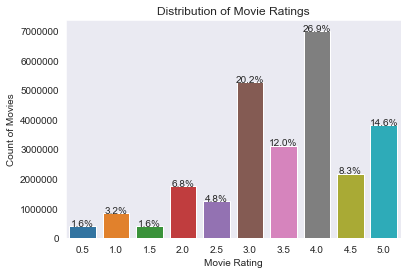

In [11]:
# Ratings Histogram:
sns.set_style("dark")
ax = sns.countplot(x="rating", data=ratings)
total = float(len(ratings))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{0:.1%}'.format(height/total),
            ha="center") 
ax.set_ylabel("Count of Movies")
ax.set_xlabel("Movie Rating")
ax.set_title("Distribution of Movie Ratings")
plt.show()

Examining the distribution of movie genre could be useful if we decide to get more sophisticated with our recommendation engine, if we branch out of user preferences (or if we're recommending to a new user), we might try to keep the movie recommendations in line with the overall genre distribution.

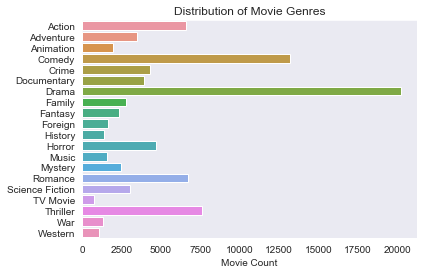

In [12]:
mlb = MultiLabelBinarizer()
genre_count = pd.DataFrame(mlb.fit_transform(movies['genres']),columns=mlb.classes_).sum()

ax = sns.barplot(genre_count.values, genre_count.index)
ax.set_xlabel("Movie Count")
ax.set_title("Distribution of Movie Genres")
plt.show()

The distribution of votes on each movie indicates that more users are willing to rate movies at a 0 than a 10, and the distribution is slightly left skewed, indicating users may be more likely to rate movies using the higher end of the scale.

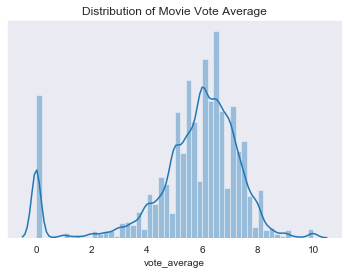

In [13]:
ax = sns.distplot(movies['vote_average'])
ax.set_ylabel("")
ax.set_yticks([])
ax.set_title("Distribution of Movie Vote Average")
plt.show()

Below is a word cloud for the common keywords found in the movies dataset.

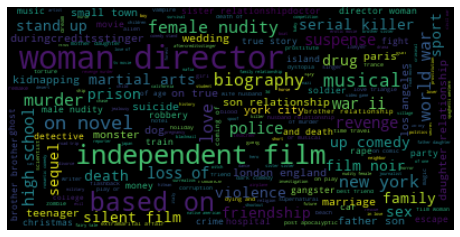

In [14]:
# Code adapted from: https://github.com/amueller/word_cloud/blob/master/examples/simple.py
l = keywords['keywords'].values.tolist()

text = []
for sublist in l:
    for item in sublist:
        text.append(item)
        
text = ' '.join(text)

wordcloud = WordCloud(max_font_size=30).generate(text)
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Top 10 Stats:
Below we'll list several top 10 statistics for movies.  For the most part, the stats will be the top 10 "blank" having the most movies.  The only exception to this is the top 10 movies by vote count.  The ordering is as follows:
* Actors with the most movies
* Genres with the most movies
* Directors with the most movies
* Producers with the most movies
* Collections with the most movies
* Original Languages with the most movies
* Spoken Languages with the most movies
* Highest rated movies by TMDB user votes (movies must have at least 1,000 votes)

In [15]:
def get_top10_list(column, plot=True):
    mlb = MultiLabelBinarizer()
    if type(movies[column][0]) == list:
        top10 = pd.DataFrame(mlb.fit_transform(movies[movies[column].str.len() > 0][column]),columns=mlb.classes_).sum().nlargest(n=10)
    else:
        top10 = movies[movies[column].str.len() > 0][column].value_counts().nlargest(10)
    ax = sns.barplot(top10.values, top10.index)
    ax.set_xlabel("Movie Count")
    ax.set_title("Top 10 {} by Movie Count".format(column.capitalize()))
    total = float(len(movies))
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/1.5
            ax.annotate(percentage, (x, y))
    if plot:
        return plt.show()
    plt.close()
    return top10

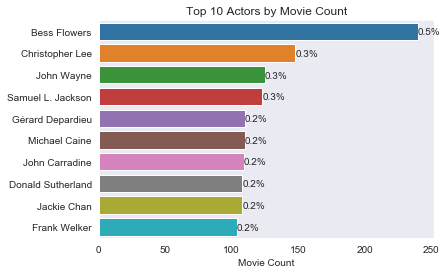

In [16]:
get_top10_list('actors')

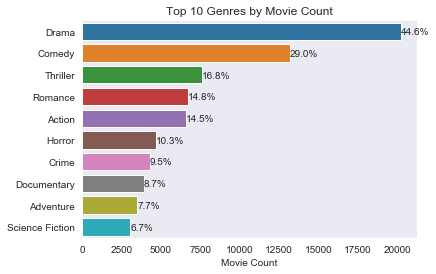

In [17]:
get_top10_list('genres')

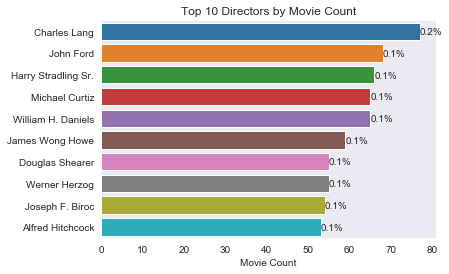

In [18]:
get_top10_list('directors')

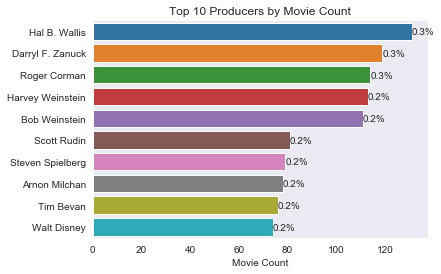

In [19]:
get_top10_list('producers')

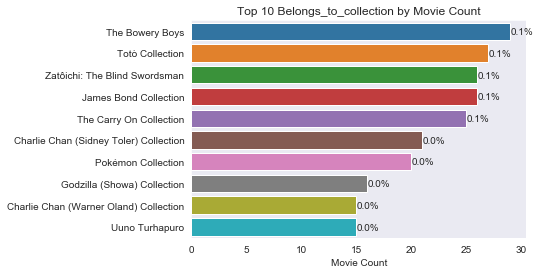

In [20]:
get_top10_list('belongs_to_collection')

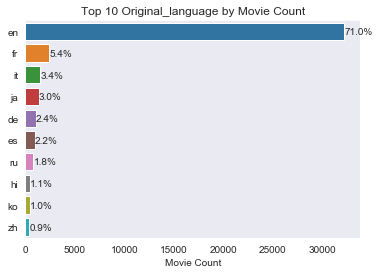

In [21]:
get_top10_list('original_language')

In [22]:
print('Top 10 Spoken Languages by Movie Count')
pd.DataFrame(get_top10_list('spoken_languages', plot=False), columns=['Movie Count'])

Top 10 Spoken Languages by Movie Count


,Movie Count
English,28727
Français,4193
Deutsch,2624
Español,2413
Italiano,2366
日本語,1756
Pусский,1563
普通话,790
हिन्दी,706
Português,591


In [23]:
movies[movies['vote_count'] > 999].nlargest(10, 'vote_average')[['title','vote_average','vote_count']]

,title,vote_average,vote_count
314,The Shawshank Redemption,8.5,8358.0
834,The Godfather,8.5,6024.0
40222,Your Name.,8.5,1030.0
292,Pulp Fiction,8.3,8670.0
522,Schindler's List,8.3,4436.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0
1176,Psycho,8.3,2405.0
1178,The Godfather: Part II,8.3,3418.0
1184,Once Upon a Time in America,8.3,1104.0
2210,Life Is Beautiful,8.3,3643.0


# Modeling and Evaluation 1

Train and adjust parameters


## Basic Explicit Model (user-item)
This is the very basic 5 liner from TuriCreate (GraphLab) that uses users, movies, and ratings to make recommendations.  We'll convert our pandas dataframes to SFrames in order to build the recommender, and let Turi Create choose a model for us.  The **ranking_factorization_recommender** (user-item) was selected, so let's see how it performs. We added a couple of paramters here **none** for userId will make predictions for all users, automatically excluding movies they've rated, and **k=5** limits the recommendations to the top 5 recommended movies per user.

Additional info from Apple's documentation: https://apple.github.io/turicreate/docs/userguide/recommender/choosing-a-model.html

*The RankingFactorizationRecommender tries to recommend items that are both similar to the items in a user's dataset and, if rating information is provided, those that would be rated highly by the user. It tends to predict ratings with less accuracy than the non-ranking factorization_recommender, but it tends to do much better at choosing items that a user would rate highly. This is because it also penalizes the predicted rating of items that are significantly different from the items a user has interacted with. In other words, it only predicts a high rating for user-item pairs in which it predicts a high rating and is confident in that prediction.*

In [231]:
%%time
data = tc.SFrame(data=ratings)

model = tc.recommender.create(data, user_id="userId", item_id="movieId", target="rating")
results = model.recommend(users=None, k=5)
model.save("my_model")

print(timebreak)

Preparing data set.

Data has 26024289 observations with 270896 users and 45115 items.

Data prepared in: 8.03705s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 3253036 / 26024289 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 16.6667           | Not Viable                               |

| 1       | 4.16667           | Not Viable                               |

| 2       | 1.04167           | Not Viable                               |

| 3       | 0.260417          | Not Viable                               |

| 4       | 0.0651042         | 1.44142                                  |

| 5       | 0.0325521         | 1.39563                                  |

| 6       | 0.016276          | 1.34152                                  |

| 7       | 0.00813802        | 1.52155                                  |

| 8       | 0.00406901        | 1.73281                                  |

| 9       | 0.00203451        | 2.02221                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.016276          | 1.34152                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 103us        | 2.22568           | 1.06544               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 13.14s       | 1.44722           | 0.968265              | 0.016276    |

| 2       | 25.96s       | 1.33084           | 0.964465              | 0.016276    |

| 3       | 38.97s       | 1.2238            | 0.937169              | 0.016276    |

| 4       | 51.59s       | 1.19208           | 0.932733              | 0.016276    |

| 5       | 1m 4s        | 1.17648           | 0.932439              | 0.016276    |

| 7       | 1m 29s       | 1.15574           | 0.930967              | 0.016276    |

| 8       | 1m 42s       | 1.1494            | 0.93063               | 0.016276    |

| 9       | 1m 54s       | 1.14356           | 0.929895              | 0.016276    |

| 10      | 2m 7s        | 1.13846           | 0.929315              | 0.016276    |

| 11      | 2m 19s       | 1.13438           | 0.928265              | 0.016276    |

| 12      | 2m 31s       | 1.13033           | 0.927846              | 0.016276    |

| 13      | 2m 43s       | 1.12675           | 0.927061              | 0.016276    |

| 14      | 2m 56s       | 1.12351           | 0.926352              | 0.016276    |

| 15      | 3m 8s        | 1.12017           | 0.925326              | 0.016276    |

| 16      | 3m 21s       | 1.11697           | 0.924492              | 0.016276    |

| 17      | 3m 33s       | 1.11411           | 0.923633              | 0.016276    |

| 18      | 3m 45s       | 1.11128           | 0.922845              | 0.016276    |

| 19      | 3m 57s       | 1.10843           | 0.921676              | 0.016276    |

| 20      | 4m 9s        | 1.10584           | 0.920945              | 0.016276    |

| 21      | 4m 21s       | 1.10335           | 0.919879              | 0.016276    |

| 22      | 4m 33s       | 1.10067           | 0.919246              | 0.016276    |

| 23      | 4m 45s       | 1.09824           | 0.918274              | 0.016276    |

| 24      | 4m 57s       | 1.09581           | 0.917217              | 0.016276    |

| 25      | 5m 10s       | 1.09359           | 0.916718              | 0.016276    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.09031

Final training RMSE: 0.913562

recommendations finished on 1000/270896 queries. users per second: 3206.6

recommendations finished on 2000/270896 queries. users per second: 3239.21

recommendations finished on 3000/270896 queries. users per second: 3247.89

recommendations finished on 4000/270896 queries. users per second: 3253.46

recommendations finished on 5000/270896 queries. users per second: 3259.87

recommendations finished on 6000/270896 queries. users per second: 3262.76

recommendations finished on 7000/270896 queries. users per second: 3264.47

recommendations finished on 8000/270896 queries. users per second: 3264.89

recommendations finished on 9000/270896 queries. users per second: 3268.54

recommendations finished on 10000/270896 queries. users per second: 3269.56

recommendations finished on 11000/270896 queries. users per second: 3269.47

recommendations finished on 12000/270896 queries. users per second: 3267.9

recommendations finished on 13000/270896 queries. users per second: 3268.2

recommendations finished on 14000/270896 queries. users per second: 3267.42

recommendations finished on 15000/270896 queries. users per second: 3267.9

recommendations finished on 16000/270896 queries. users per second: 3269.93

recommendations finished on 17000/270896 queries. users per second: 3268.06

recommendations finished on 18000/270896 queries. users per second: 3268.76

recommendations finished on 19000/270896 queries. users per second: 3269.04

recommendations finished on 20000/270896 queries. users per second: 3267.28

recommendations finished on 21000/270896 queries. users per second: 3263.82

recommendations finished on 22000/270896 queries. users per second: 3263.56

recommendations finished on 23000/270896 queries. users per second: 3263.21

recommendations finished on 24000/270896 queries. users per second: 3258.38

recommendations finished on 25000/270896 queries. users per second: 3253.33

recommendations finished on 26000/270896 queries. users per second: 3249.57

recommendations finished on 27000/270896 queries. users per second: 3246.98

recommendations finished on 28000/270896 queries. users per second: 3248.43

recommendations finished on 29000/270896 queries. users per second: 3248.96

recommendations finished on 30000/270896 queries. users per second: 3247.9

recommendations finished on 31000/270896 queries. users per second: 3249.08

recommendations finished on 32000/270896 queries. users per second: 3249.95

recommendations finished on 33000/270896 queries. users per second: 3248.83

recommendations finished on 34000/270896 queries. users per second: 3248.91

recommendations finished on 35000/270896 queries. users per second: 3250.05

recommendations finished on 36000/270896 queries. users per second: 3250.84

recommendations finished on 37000/270896 queries. users per second: 3251.22

recommendations finished on 38000/270896 queries. users per second: 3252.33

recommendations finished on 39000/270896 queries. users per second: 3253.01

recommendations finished on 40000/270896 queries. users per second: 3253.67

recommendations finished on 41000/270896 queries. users per second: 3254.29

recommendations finished on 42000/270896 queries. users per second: 3253.75

recommendations finished on 43000/270896 queries. users per second: 3250.85

recommendations finished on 44000/270896 queries. users per second: 3249.82

recommendations finished on 45000/270896 queries. users per second: 3246.51

recommendations finished on 46000/270896 queries. users per second: 3242.16

recommendations finished on 47000/270896 queries. users per second: 3241.09

recommendations finished on 48000/270896 queries. users per second: 3241.34

recommendations finished on 49000/270896 queries. users per second: 3241.99

recommendations finished on 50000/270896 queries. users per second: 3241.04

recommendations finished on 51000/270896 queries. users per second: 3241.94

recommendations finished on 52000/270896 queries. users per second: 3242.07

recommendations finished on 53000/270896 queries. users per second: 3242.37

recommendations finished on 54000/270896 queries. users per second: 3242.52

recommendations finished on 55000/270896 queries. users per second: 3243.32

recommendations finished on 56000/270896 queries. users per second: 3242.23

recommendations finished on 57000/270896 queries. users per second: 3241.91

recommendations finished on 58000/270896 queries. users per second: 3240.71

recommendations finished on 59000/270896 queries. users per second: 3239.26

recommendations finished on 60000/270896 queries. users per second: 3239.86

recommendations finished on 61000/270896 queries. users per second: 3240.22

recommendations finished on 62000/270896 queries. users per second: 3239.99

recommendations finished on 63000/270896 queries. users per second: 3240.22

recommendations finished on 64000/270896 queries. users per second: 3240.78

recommendations finished on 65000/270896 queries. users per second: 3240.99

recommendations finished on 66000/270896 queries. users per second: 3241.07

recommendations finished on 67000/270896 queries. users per second: 3240.9

recommendations finished on 68000/270896 queries. users per second: 3240.74

recommendations finished on 69000/270896 queries. users per second: 3240.28

recommendations finished on 70000/270896 queries. users per second: 3240.37

recommendations finished on 71000/270896 queries. users per second: 3240.46

recommendations finished on 72000/270896 queries. users per second: 3240.07

recommendations finished on 73000/270896 queries. users per second: 3240.13

recommendations finished on 74000/270896 queries. users per second: 3240.69

recommendations finished on 75000/270896 queries. users per second: 3241.04

recommendations finished on 76000/270896 queries. users per second: 3241.22

recommendations finished on 77000/270896 queries. users per second: 3240.66

recommendations finished on 78000/270896 queries. users per second: 3240.49

recommendations finished on 79000/270896 queries. users per second: 3240.33

recommendations finished on 80000/270896 queries. users per second: 3240.45

recommendations finished on 81000/270896 queries. users per second: 3240.54

recommendations finished on 82000/270896 queries. users per second: 3240.17

recommendations finished on 83000/270896 queries. users per second: 3240.37

recommendations finished on 84000/270896 queries. users per second: 3240.26

recommendations finished on 85000/270896 queries. users per second: 3240.36

recommendations finished on 86000/270896 queries. users per second: 3239.41

recommendations finished on 87000/270896 queries. users per second: 3239.09

recommendations finished on 88000/270896 queries. users per second: 3239.06

recommendations finished on 89000/270896 queries. users per second: 3239.19

recommendations finished on 90000/270896 queries. users per second: 3239.58

recommendations finished on 91000/270896 queries. users per second: 3239.37

recommendations finished on 92000/270896 queries. users per second: 3239.22

recommendations finished on 93000/270896 queries. users per second: 3239.42

recommendations finished on 94000/270896 queries. users per second: 3239.57

recommendations finished on 95000/270896 queries. users per second: 3239.55

recommendations finished on 96000/270896 queries. users per second: 3238.5

recommendations finished on 97000/270896 queries. users per second: 3234.51

recommendations finished on 98000/270896 queries. users per second: 3231.7

recommendations finished on 99000/270896 queries. users per second: 3227.88

recommendations finished on 100000/270896 queries. users per second: 3227.09

recommendations finished on 101000/270896 queries. users per second: 3226.8

recommendations finished on 102000/270896 queries. users per second: 3227.15

recommendations finished on 103000/270896 queries. users per second: 3227.65

recommendations finished on 104000/270896 queries. users per second: 3227.95

recommendations finished on 105000/270896 queries. users per second: 3228.35

recommendations finished on 106000/270896 queries. users per second: 3228.71

recommendations finished on 107000/270896 queries. users per second: 3229.12

recommendations finished on 108000/270896 queries. users per second: 3229.58

recommendations finished on 109000/270896 queries. users per second: 3229.95

recommendations finished on 110000/270896 queries. users per second: 3229.83

recommendations finished on 111000/270896 queries. users per second: 3229.72

recommendations finished on 112000/270896 queries. users per second: 3229

recommendations finished on 113000/270896 queries. users per second: 3229.37

recommendations finished on 114000/270896 queries. users per second: 3229.47

recommendations finished on 115000/270896 queries. users per second: 3229.73

recommendations finished on 116000/270896 queries. users per second: 3229.86

recommendations finished on 117000/270896 queries. users per second: 3230.1

recommendations finished on 118000/270896 queries. users per second: 3230.42

recommendations finished on 119000/270896 queries. users per second: 3230.84

recommendations finished on 120000/270896 queries. users per second: 3231.17

recommendations finished on 121000/270896 queries. users per second: 3231.25

recommendations finished on 122000/270896 queries. users per second: 3231.68

recommendations finished on 123000/270896 queries. users per second: 3231.95

recommendations finished on 124000/270896 queries. users per second: 3231.76

recommendations finished on 125000/270896 queries. users per second: 3231.97

recommendations finished on 126000/270896 queries. users per second: 3232.13

recommendations finished on 127000/270896 queries. users per second: 3232.26

recommendations finished on 128000/270896 queries. users per second: 3232.41

recommendations finished on 129000/270896 queries. users per second: 3232.86

recommendations finished on 130000/270896 queries. users per second: 3232.84

recommendations finished on 131000/270896 queries. users per second: 3233.09

recommendations finished on 132000/270896 queries. users per second: 3233.26

recommendations finished on 133000/270896 queries. users per second: 3233.59

recommendations finished on 134000/270896 queries. users per second: 3232.27

recommendations finished on 135000/270896 queries. users per second: 3232.55

recommendations finished on 136000/270896 queries. users per second: 3232.95

recommendations finished on 137000/270896 queries. users per second: 3233.03

recommendations finished on 138000/270896 queries. users per second: 3233.27

recommendations finished on 139000/270896 queries. users per second: 3233.53

recommendations finished on 140000/270896 queries. users per second: 3233.6

recommendations finished on 141000/270896 queries. users per second: 3233.87

recommendations finished on 142000/270896 queries. users per second: 3233.6

recommendations finished on 143000/270896 queries. users per second: 3233.66

recommendations finished on 144000/270896 queries. users per second: 3233.47

recommendations finished on 145000/270896 queries. users per second: 3233.74

recommendations finished on 146000/270896 queries. users per second: 3233.94

recommendations finished on 147000/270896 queries. users per second: 3233.91

recommendations finished on 148000/270896 queries. users per second: 3234.21

recommendations finished on 149000/270896 queries. users per second: 3234.44

recommendations finished on 150000/270896 queries. users per second: 3234.53

recommendations finished on 151000/270896 queries. users per second: 3234.79

recommendations finished on 152000/270896 queries. users per second: 3235.08

recommendations finished on 153000/270896 queries. users per second: 3235.17

recommendations finished on 154000/270896 queries. users per second: 3235.41

recommendations finished on 155000/270896 queries. users per second: 3235.73

recommendations finished on 156000/270896 queries. users per second: 3235.66

recommendations finished on 157000/270896 queries. users per second: 3235.93

recommendations finished on 158000/270896 queries. users per second: 3236.04

recommendations finished on 159000/270896 queries. users per second: 3236.21

recommendations finished on 160000/270896 queries. users per second: 3236.27

recommendations finished on 161000/270896 queries. users per second: 3236.47

recommendations finished on 162000/270896 queries. users per second: 3236.72

recommendations finished on 163000/270896 queries. users per second: 3236.63

recommendations finished on 164000/270896 queries. users per second: 3236.64

recommendations finished on 165000/270896 queries. users per second: 3236.65

recommendations finished on 166000/270896 queries. users per second: 3236.72

recommendations finished on 167000/270896 queries. users per second: 3236.99

recommendations finished on 168000/270896 queries. users per second: 3237.01

recommendations finished on 169000/270896 queries. users per second: 3237.21

recommendations finished on 170000/270896 queries. users per second: 3237.26

recommendations finished on 171000/270896 queries. users per second: 3237.46

recommendations finished on 172000/270896 queries. users per second: 3237.68

recommendations finished on 173000/270896 queries. users per second: 3237.69

recommendations finished on 174000/270896 queries. users per second: 3237.96

recommendations finished on 175000/270896 queries. users per second: 3238.09

recommendations finished on 176000/270896 queries. users per second: 3237.48

recommendations finished on 177000/270896 queries. users per second: 3237.58

recommendations finished on 178000/270896 queries. users per second: 3237.64

recommendations finished on 179000/270896 queries. users per second: 3237.59

recommendations finished on 180000/270896 queries. users per second: 3237.65

recommendations finished on 181000/270896 queries. users per second: 3237.41

recommendations finished on 182000/270896 queries. users per second: 3237.56

recommendations finished on 183000/270896 queries. users per second: 3237.67

recommendations finished on 184000/270896 queries. users per second: 3237.81

recommendations finished on 185000/270896 queries. users per second: 3237.89

recommendations finished on 186000/270896 queries. users per second: 3237.87

recommendations finished on 187000/270896 queries. users per second: 3238.04

recommendations finished on 188000/270896 queries. users per second: 3238.32

recommendations finished on 189000/270896 queries. users per second: 3238.2

recommendations finished on 190000/270896 queries. users per second: 3238.36

recommendations finished on 191000/270896 queries. users per second: 3238.48

recommendations finished on 192000/270896 queries. users per second: 3238.49

recommendations finished on 193000/270896 queries. users per second: 3238.53

recommendations finished on 194000/270896 queries. users per second: 3238.62

recommendations finished on 195000/270896 queries. users per second: 3238.62

recommendations finished on 196000/270896 queries. users per second: 3238.62

recommendations finished on 197000/270896 queries. users per second: 3238.67

recommendations finished on 198000/270896 queries. users per second: 3238.82

recommendations finished on 199000/270896 queries. users per second: 3238.8

recommendations finished on 200000/270896 queries. users per second: 3238.87

recommendations finished on 201000/270896 queries. users per second: 3239.01

recommendations finished on 202000/270896 queries. users per second: 3239.02

recommendations finished on 203000/270896 queries. users per second: 3239.2

recommendations finished on 204000/270896 queries. users per second: 3239.34

recommendations finished on 205000/270896 queries. users per second: 3239.26

recommendations finished on 206000/270896 queries. users per second: 3239.38

recommendations finished on 207000/270896 queries. users per second: 3239.44

recommendations finished on 208000/270896 queries. users per second: 3239.43

recommendations finished on 209000/270896 queries. users per second: 3239.44

recommendations finished on 210000/270896 queries. users per second: 3239.67

recommendations finished on 211000/270896 queries. users per second: 3239.6

recommendations finished on 212000/270896 queries. users per second: 3239.57

recommendations finished on 213000/270896 queries. users per second: 3239.5

recommendations finished on 214000/270896 queries. users per second: 3239.53

recommendations finished on 215000/270896 queries. users per second: 3239.53

recommendations finished on 216000/270896 queries. users per second: 3239.57

recommendations finished on 217000/270896 queries. users per second: 3239.76

recommendations finished on 218000/270896 queries. users per second: 3239.78

recommendations finished on 219000/270896 queries. users per second: 3239.58

recommendations finished on 220000/270896 queries. users per second: 3239.52

recommendations finished on 221000/270896 queries. users per second: 3239.43

recommendations finished on 222000/270896 queries. users per second: 3239.39

recommendations finished on 223000/270896 queries. users per second: 3239.32

recommendations finished on 224000/270896 queries. users per second: 3239.23

recommendations finished on 225000/270896 queries. users per second: 3239.1

recommendations finished on 226000/270896 queries. users per second: 3238.95

recommendations finished on 227000/270896 queries. users per second: 3238.64

recommendations finished on 228000/270896 queries. users per second: 3238.62

recommendations finished on 229000/270896 queries. users per second: 3238.43

recommendations finished on 230000/270896 queries. users per second: 3238.55

recommendations finished on 231000/270896 queries. users per second: 3238.54

recommendations finished on 232000/270896 queries. users per second: 3238.57

recommendations finished on 233000/270896 queries. users per second: 3238.65

recommendations finished on 234000/270896 queries. users per second: 3238.52

recommendations finished on 235000/270896 queries. users per second: 3238.01

recommendations finished on 236000/270896 queries. users per second: 3237.95

recommendations finished on 237000/270896 queries. users per second: 3237.93

recommendations finished on 238000/270896 queries. users per second: 3237.94

recommendations finished on 239000/270896 queries. users per second: 3237.93

recommendations finished on 240000/270896 queries. users per second: 3237.97

recommendations finished on 241000/270896 queries. users per second: 3237.98

recommendations finished on 242000/270896 queries. users per second: 3238.04

recommendations finished on 243000/270896 queries. users per second: 3238.14

recommendations finished on 244000/270896 queries. users per second: 3238.11

recommendations finished on 245000/270896 queries. users per second: 3238.15

recommendations finished on 246000/270896 queries. users per second: 3237.34

recommendations finished on 247000/270896 queries. users per second: 3237.29

recommendations finished on 248000/270896 queries. users per second: 3237.17

recommendations finished on 249000/270896 queries. users per second: 3237.29

recommendations finished on 250000/270896 queries. users per second: 3237.3

recommendations finished on 251000/270896 queries. users per second: 3237.38

recommendations finished on 252000/270896 queries. users per second: 3237.46

recommendations finished on 253000/270896 queries. users per second: 3237.56

recommendations finished on 254000/270896 queries. users per second: 3237.55

recommendations finished on 255000/270896 queries. users per second: 3237.65

recommendations finished on 256000/270896 queries. users per second: 3237.75

recommendations finished on 257000/270896 queries. users per second: 3237.42

recommendations finished on 258000/270896 queries. users per second: 3237.34

recommendations finished on 259000/270896 queries. users per second: 3237.42

recommendations finished on 260000/270896 queries. users per second: 3237.42

recommendations finished on 261000/270896 queries. users per second: 3237.4

recommendations finished on 262000/270896 queries. users per second: 3237.07

recommendations finished on 263000/270896 queries. users per second: 3236.62

recommendations finished on 264000/270896 queries. users per second: 3236.25

recommendations finished on 265000/270896 queries. users per second: 3235.91

recommendations finished on 266000/270896 queries. users per second: 3235.25

recommendations finished on 267000/270896 queries. users per second: 3234.31

recommendations finished on 268000/270896 queries. users per second: 3233.07

recommendations finished on 269000/270896 queries. users per second: 3230.46

recommendations finished on 270000/270896 queries. users per second: 3223.94



----------------------------------------------------
Cell Processing Time
CPU times: user 1h 54min 19s, sys: 1min 6s, total: 1h 55min 26s
Wall time: 7min 57s


In [232]:
results

userId,movieId,score,rank
1,318,5.149854127623358,1
1,50,5.015436720408716,2
1,527,4.961953211881437,3
1,296,4.9530253897684,4
1,1193,4.905803341724195,5
2,318,5.436264362491884,1
2,50,5.278720673479357,2
2,858,5.2698624248879335,3
2,527,5.257744264163294,4
2,1221,5.157529842414179,5


In [233]:
%%time
df = ratings.merge(links_small, how='left', on='movieId')
df = df.merge(movies, how='left', left_on='tmdbId', right_on='id')

#ratings_small_plus = ratings_small.merge(links_small, how='left', on='movieId')
#ratings_small_plus = ratings_small_plus.merge(movies, how='left', left_on='tmdbId', right_on='id')


df = df[['userId','movieId','rating','genre_dict','belongs_to_collection']]
df = df[~df['genre_dict'].isnull()]
df = df[~df['belongs_to_collection'].isnull()]

data = tc.SFrame(data=df)

model = tc.recommender.create(data, user_id="userId", item_id="movieId", target="rating")
results = model.recommend(users=None, k=5)
model.save("my_model")

print(timebreak)

Preparing data set.

Data has 8396130 observations with 260134 users and 1672 items.

Data prepared in: 3.88144s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 1049516 / 8396130 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 12.5              | Not Viable                               |

| 1       | 3.125             | Not Viable                               |

| 2       | 0.78125           | 1.66093                                  |

| 3       | 0.390625          | 0.413884                                 |

| 4       | 0.195312          | 0.0981463                                |

| 5       | 0.0976562         | 0.0847623                                |

| 6       | 0.0488281         | 0.135411                                 |

| 7       | 0.0244141         | 0.27426                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 0.0847623                                |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 132us        | 2.39361           | 1.10489               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 3.61s        | 0.904872          | 0.908941              | 0.0976562   |

| 2       | 6.43s        | 0.497252          | 0.687727              | 0.0976562   |

| 3       | 9.22s        | 0.398681          | 0.62126               | 0.0976562   |

| 4       | 11.96s       | 0.358747          | 0.591049              | 0.0976562   |

| 5       | 14.68s       | 0.336812          | 0.573552              | 0.0976562   |

| 10      | 27.96s       | 0.29578           | 0.538564              | 0.0976562   |

| 15      | 41.46s       | 0.281365          | 0.525641              | 0.0976562   |

| 20      | 54.44s       | 0.273536          | 0.518399              | 0.0976562   |

| 25      | 1m 7s        | 0.268392          | 0.513597              | 0.0976562   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.249404

Final training RMSE: 0.494751

recommendations finished on 1000/260134 queries. users per second: 81281

recommendations finished on 2000/260134 queries. users per second: 83028.9

recommendations finished on 3000/260134 queries. users per second: 83979.5

recommendations finished on 4000/260134 queries. users per second: 83234.5

recommendations finished on 5000/260134 queries. users per second: 83564.5

recommendations finished on 6000/260134 queries. users per second: 83638.8

recommendations finished on 7000/260134 queries. users per second: 83157.1

recommendations finished on 8000/260134 queries. users per second: 82911.9

recommendations finished on 9000/260134 queries. users per second: 82941.7

recommendations finished on 10000/260134 queries. users per second: 82852.1

recommendations finished on 11000/260134 queries. users per second: 83055.2

recommendations finished on 12000/260134 queries. users per second: 83034.6

recommendations finished on 13000/260134 queries. users per second: 83082

recommendations finished on 14000/260134 queries. users per second: 83274.8

recommendations finished on 15000/260134 queries. users per second: 83300

recommendations finished on 16000/260134 queries. users per second: 83379.8

recommendations finished on 17000/260134 queries. users per second: 83496.2

recommendations finished on 18000/260134 queries. users per second: 83476.3

recommendations finished on 19000/260134 queries. users per second: 83585.2

recommendations finished on 20000/260134 queries. users per second: 83670.1

recommendations finished on 21000/260134 queries. users per second: 83712.4

recommendations finished on 22000/260134 queries. users per second: 83827.4

recommendations finished on 23000/260134 queries. users per second: 83803.1

recommendations finished on 24000/260134 queries. users per second: 83773.1

recommendations finished on 25000/260134 queries. users per second: 83768.4

recommendations finished on 26000/260134 queries. users per second: 83838.8

recommendations finished on 27000/260134 queries. users per second: 83779.9

recommendations finished on 28000/260134 queries. users per second: 83811.5

recommendations finished on 29000/260134 queries. users per second: 83857.2

recommendations finished on 30000/260134 queries. users per second: 83805.4

recommendations finished on 31000/260134 queries. users per second: 83885.8

recommendations finished on 32000/260134 queries. users per second: 83935.1

recommendations finished on 33000/260134 queries. users per second: 83838.7

recommendations finished on 34000/260134 queries. users per second: 83700.8

recommendations finished on 35000/260134 queries. users per second: 83641.2

recommendations finished on 36000/260134 queries. users per second: 83654.6

recommendations finished on 37000/260134 queries. users per second: 83672.5

recommendations finished on 38000/260134 queries. users per second: 83675.4

recommendations finished on 39000/260134 queries. users per second: 83666

recommendations finished on 40000/260134 queries. users per second: 83577.3

recommendations finished on 41000/260134 queries. users per second: 83550.9

recommendations finished on 42000/260134 queries. users per second: 83584.6

recommendations finished on 43000/260134 queries. users per second: 83664.6

recommendations finished on 44000/260134 queries. users per second: 83624.4

recommendations finished on 45000/260134 queries. users per second: 83704

recommendations finished on 46000/260134 queries. users per second: 83751.3

recommendations finished on 47000/260134 queries. users per second: 83776.1

recommendations finished on 48000/260134 queries. users per second: 83882.5

recommendations finished on 49000/260134 queries. users per second: 83970.8

recommendations finished on 50000/260134 queries. users per second: 83936.1

recommendations finished on 51000/260134 queries. users per second: 84033.6

recommendations finished on 52000/260134 queries. users per second: 84116.8

recommendations finished on 53000/260134 queries. users per second: 84121.5

recommendations finished on 54000/260134 queries. users per second: 84197.9

recommendations finished on 55000/260134 queries. users per second: 84256.5

recommendations finished on 56000/260134 queries. users per second: 84290.1

recommendations finished on 57000/260134 queries. users per second: 84336.5

recommendations finished on 58000/260134 queries. users per second: 84419.5

recommendations finished on 59000/260134 queries. users per second: 84421.6

recommendations finished on 60000/260134 queries. users per second: 84502.9

recommendations finished on 61000/260134 queries. users per second: 84540.7

recommendations finished on 62000/260134 queries. users per second: 84526.7

recommendations finished on 63000/260134 queries. users per second: 84577.9

recommendations finished on 64000/260134 queries. users per second: 84607.1

recommendations finished on 65000/260134 queries. users per second: 84587.5

recommendations finished on 66000/260134 queries. users per second: 84643.3

recommendations finished on 67000/260134 queries. users per second: 84705.4

recommendations finished on 68000/260134 queries. users per second: 84694.7

recommendations finished on 69000/260134 queries. users per second: 84716.3

recommendations finished on 70000/260134 queries. users per second: 84766.2

recommendations finished on 71000/260134 queries. users per second: 84777.7

recommendations finished on 72000/260134 queries. users per second: 84828.5

recommendations finished on 73000/260134 queries. users per second: 84854.6

recommendations finished on 74000/260134 queries. users per second: 84877.2

recommendations finished on 75000/260134 queries. users per second: 84924.1

recommendations finished on 76000/260134 queries. users per second: 84980.7

recommendations finished on 77000/260134 queries. users per second: 84987

recommendations finished on 78000/260134 queries. users per second: 85032.8

recommendations finished on 79000/260134 queries. users per second: 85063.7

recommendations finished on 80000/260134 queries. users per second: 85054.2

recommendations finished on 81000/260134 queries. users per second: 85101.8

recommendations finished on 82000/260134 queries. users per second: 85154.8

recommendations finished on 83000/260134 queries. users per second: 85168.9

recommendations finished on 84000/260134 queries. users per second: 85187.7

recommendations finished on 85000/260134 queries. users per second: 85221.7

recommendations finished on 86000/260134 queries. users per second: 85160.3

recommendations finished on 87000/260134 queries. users per second: 85187.9

recommendations finished on 88000/260134 queries. users per second: 85180

recommendations finished on 89000/260134 queries. users per second: 85207.3

recommendations finished on 90000/260134 queries. users per second: 85257.9

recommendations finished on 91000/260134 queries. users per second: 85252.4

recommendations finished on 92000/260134 queries. users per second: 85253.9

recommendations finished on 93000/260134 queries. users per second: 85283.4

recommendations finished on 94000/260134 queries. users per second: 85288.3

recommendations finished on 95000/260134 queries. users per second: 85321

recommendations finished on 96000/260134 queries. users per second: 85349.3

recommendations finished on 97000/260134 queries. users per second: 85352.3

recommendations finished on 98000/260134 queries. users per second: 85372.3

recommendations finished on 99000/260134 queries. users per second: 85413.2

recommendations finished on 100000/260134 queries. users per second: 85403.3

recommendations finished on 101000/260134 queries. users per second: 85399.8

recommendations finished on 102000/260134 queries. users per second: 85423.2

recommendations finished on 103000/260134 queries. users per second: 85407.6

recommendations finished on 104000/260134 queries. users per second: 85417.5

recommendations finished on 105000/260134 queries. users per second: 85439.8

recommendations finished on 106000/260134 queries. users per second: 85431.5

recommendations finished on 107000/260134 queries. users per second: 85463.7

recommendations finished on 108000/260134 queries. users per second: 85468.2

recommendations finished on 109000/260134 queries. users per second: 85445.8

recommendations finished on 110000/260134 queries. users per second: 85468.7

recommendations finished on 111000/260134 queries. users per second: 85495.8

recommendations finished on 112000/260134 queries. users per second: 85506.4

recommendations finished on 113000/260134 queries. users per second: 85533.9

recommendations finished on 114000/260134 queries. users per second: 85555.7

recommendations finished on 115000/260134 queries. users per second: 85543.2

recommendations finished on 116000/260134 queries. users per second: 85550.8

recommendations finished on 117000/260134 queries. users per second: 85578.9

recommendations finished on 118000/260134 queries. users per second: 85558

recommendations finished on 119000/260134 queries. users per second: 85590.4

recommendations finished on 120000/260134 queries. users per second: 85583.2

recommendations finished on 121000/260134 queries. users per second: 85547.3

recommendations finished on 122000/260134 queries. users per second: 85576.1

recommendations finished on 123000/260134 queries. users per second: 85601.8

recommendations finished on 124000/260134 queries. users per second: 85591.7

recommendations finished on 125000/260134 queries. users per second: 85599.8

recommendations finished on 126000/260134 queries. users per second: 85571.2

recommendations finished on 127000/260134 queries. users per second: 85543.7

recommendations finished on 128000/260134 queries. users per second: 85570.4

recommendations finished on 129000/260134 queries. users per second: 85581.1

recommendations finished on 130000/260134 queries. users per second: 85566.8

recommendations finished on 131000/260134 queries. users per second: 85588.3

recommendations finished on 132000/260134 queries. users per second: 85611.9

recommendations finished on 133000/260134 queries. users per second: 85613.7

recommendations finished on 134000/260134 queries. users per second: 85638.3

recommendations finished on 135000/260134 queries. users per second: 85672.4

recommendations finished on 136000/260134 queries. users per second: 85658.6

recommendations finished on 137000/260134 queries. users per second: 85666

recommendations finished on 138000/260134 queries. users per second: 85691.2

recommendations finished on 139000/260134 queries. users per second: 85679.9

recommendations finished on 140000/260134 queries. users per second: 85707.7

recommendations finished on 141000/260134 queries. users per second: 85711.9

recommendations finished on 142000/260134 queries. users per second: 85680.5

recommendations finished on 143000/260134 queries. users per second: 85709.4

recommendations finished on 144000/260134 queries. users per second: 85728.6

recommendations finished on 145000/260134 queries. users per second: 85703.1

recommendations finished on 146000/260134 queries. users per second: 85730

recommendations finished on 147000/260134 queries. users per second: 85753.5

recommendations finished on 148000/260134 queries. users per second: 85746.2

recommendations finished on 149000/260134 queries. users per second: 85751.2

recommendations finished on 150000/260134 queries. users per second: 85772.2

recommendations finished on 151000/260134 queries. users per second: 85730.1

recommendations finished on 152000/260134 queries. users per second: 85753.6

recommendations finished on 153000/260134 queries. users per second: 85723

recommendations finished on 154000/260134 queries. users per second: 85706.1

recommendations finished on 155000/260134 queries. users per second: 85726.2

recommendations finished on 156000/260134 queries. users per second: 85728.4

recommendations finished on 157000/260134 queries. users per second: 85699.4

recommendations finished on 158000/260134 queries. users per second: 85686.3

recommendations finished on 159000/260134 queries. users per second: 85702.7

recommendations finished on 160000/260134 queries. users per second: 85701.9

recommendations finished on 161000/260134 queries. users per second: 85707.7

recommendations finished on 162000/260134 queries. users per second: 85708.5

recommendations finished on 163000/260134 queries. users per second: 85715.3

recommendations finished on 164000/260134 queries. users per second: 85730

recommendations finished on 165000/260134 queries. users per second: 85714

recommendations finished on 166000/260134 queries. users per second: 85718.8

recommendations finished on 167000/260134 queries. users per second: 85739.3

recommendations finished on 168000/260134 queries. users per second: 85748.8

recommendations finished on 169000/260134 queries. users per second: 85757.2

recommendations finished on 170000/260134 queries. users per second: 85778.1

recommendations finished on 171000/260134 queries. users per second: 85787

recommendations finished on 172000/260134 queries. users per second: 85788.6

recommendations finished on 173000/260134 queries. users per second: 85790.8

recommendations finished on 174000/260134 queries. users per second: 85799.5

recommendations finished on 175000/260134 queries. users per second: 85802.1

recommendations finished on 176000/260134 queries. users per second: 85813.2

recommendations finished on 177000/260134 queries. users per second: 85804.4

recommendations finished on 178000/260134 queries. users per second: 85797.6

recommendations finished on 179000/260134 queries. users per second: 85814.2

recommendations finished on 180000/260134 queries. users per second: 85818.9

recommendations finished on 181000/260134 queries. users per second: 85823.6

recommendations finished on 182000/260134 queries. users per second: 85834.5

recommendations finished on 183000/260134 queries. users per second: 85839.8

recommendations finished on 184000/260134 queries. users per second: 85845.5

recommendations finished on 185000/260134 queries. users per second: 85842

recommendations finished on 186000/260134 queries. users per second: 85831.2

recommendations finished on 187000/260134 queries. users per second: 85841.9

recommendations finished on 188000/260134 queries. users per second: 85863.1

recommendations finished on 189000/260134 queries. users per second: 85844.1

recommendations finished on 190000/260134 queries. users per second: 85845.4

recommendations finished on 191000/260134 queries. users per second: 85853.8

recommendations finished on 192000/260134 queries. users per second: 85826.4

recommendations finished on 193000/260134 queries. users per second: 85829

recommendations finished on 194000/260134 queries. users per second: 85824.3

recommendations finished on 195000/260134 queries. users per second: 85804.5

recommendations finished on 196000/260134 queries. users per second: 85809.3

recommendations finished on 197000/260134 queries. users per second: 85818.7

recommendations finished on 198000/260134 queries. users per second: 85806.4

recommendations finished on 199000/260134 queries. users per second: 85815.8

recommendations finished on 200000/260134 queries. users per second: 85823.8

recommendations finished on 201000/260134 queries. users per second: 85799.7

recommendations finished on 202000/260134 queries. users per second: 85798.2

recommendations finished on 203000/260134 queries. users per second: 85811

recommendations finished on 204000/260134 queries. users per second: 85809.2

recommendations finished on 205000/260134 queries. users per second: 85825.3

recommendations finished on 206000/260134 queries. users per second: 85823

recommendations finished on 207000/260134 queries. users per second: 85799.6

recommendations finished on 208000/260134 queries. users per second: 85810.9

recommendations finished on 209000/260134 queries. users per second: 85820.1

recommendations finished on 210000/260134 queries. users per second: 85814

recommendations finished on 211000/260134 queries. users per second: 85827.2

recommendations finished on 212000/260134 queries. users per second: 85831.7

recommendations finished on 213000/260134 queries. users per second: 85806.1

recommendations finished on 214000/260134 queries. users per second: 85791

recommendations finished on 215000/260134 queries. users per second: 85808.4

recommendations finished on 216000/260134 queries. users per second: 85807.2

recommendations finished on 217000/260134 queries. users per second: 85818.8

recommendations finished on 218000/260134 queries. users per second: 85837.3

recommendations finished on 219000/260134 queries. users per second: 85828.5

recommendations finished on 220000/260134 queries. users per second: 85830.6

recommendations finished on 221000/260134 queries. users per second: 85847.6

recommendations finished on 222000/260134 queries. users per second: 85835.3

recommendations finished on 223000/260134 queries. users per second: 85847.8

recommendations finished on 224000/260134 queries. users per second: 85856.2

recommendations finished on 225000/260134 queries. users per second: 85835.6

recommendations finished on 226000/260134 queries. users per second: 85849.1

recommendations finished on 227000/260134 queries. users per second: 85862.5

recommendations finished on 228000/260134 queries. users per second: 85811.4

recommendations finished on 229000/260134 queries. users per second: 85801

recommendations finished on 230000/260134 queries. users per second: 85796.9

recommendations finished on 231000/260134 queries. users per second: 85803.5

recommendations finished on 232000/260134 queries. users per second: 85810.1

recommendations finished on 233000/260134 queries. users per second: 85806.7

recommendations finished on 234000/260134 queries. users per second: 85811.1

recommendations finished on 235000/260134 queries. users per second: 85814.2

recommendations finished on 236000/260134 queries. users per second: 85794.1

recommendations finished on 237000/260134 queries. users per second: 85774.2

recommendations finished on 238000/260134 queries. users per second: 85771.6

recommendations finished on 239000/260134 queries. users per second: 85752.6

recommendations finished on 240000/260134 queries. users per second: 85746.2

recommendations finished on 241000/260134 queries. users per second: 85741.5

recommendations finished on 242000/260134 queries. users per second: 85705.6

recommendations finished on 243000/260134 queries. users per second: 85683.8

recommendations finished on 244000/260134 queries. users per second: 85657.5

recommendations finished on 245000/260134 queries. users per second: 85626.9

recommendations finished on 246000/260134 queries. users per second: 85606.9

recommendations finished on 247000/260134 queries. users per second: 85577.5

recommendations finished on 248000/260134 queries. users per second: 85558.8

recommendations finished on 249000/260134 queries. users per second: 85536.7

recommendations finished on 250000/260134 queries. users per second: 85494.9

recommendations finished on 251000/260134 queries. users per second: 85437.6

recommendations finished on 252000/260134 queries. users per second: 85357.1

recommendations finished on 253000/260134 queries. users per second: 85227.3

recommendations finished on 254000/260134 queries. users per second: 85078

recommendations finished on 255000/260134 queries. users per second: 84917.3

recommendations finished on 256000/260134 queries. users per second: 84638.9

recommendations finished on 257000/260134 queries. users per second: 84353.9

recommendations finished on 258000/260134 queries. users per second: 83834.9

recommendations finished on 259000/260134 queries. users per second: 83248

recommendations finished on 260000/260134 queries. users per second: 81856.2



----------------------------------------------------
Cell Processing Time
CPU times: user 23min 26s, sys: 25.9 s, total: 23min 52s
Wall time: 2min 41s


In [234]:
results

userId,movieId,score,rank
1,2571,4.575253279193512,1
1,1,4.31492284057962,2
1,593,4.281789214595428,3
1,541,4.267735262646547,4
1,49272,4.236313999875656,5
2,2571,4.8047915820621165,1
2,593,4.526352000667921,2
2,1270,4.247524631454817,3
2,589,4.206580576732031,4
2,329,4.116424364282957,5


In [241]:
%%time
df = ratings_small.merge(links_small, how='left', on='movieId')
df = df.merge(movies, how='left', left_on='tmdbId', right_on='id')

#ratings_small_plus = ratings_small.merge(links_small, how='left', on='movieId')
#ratings_small_plus = ratings_small_plus.merge(movies, how='left', left_on='tmdbId', right_on='id')


df = df[['userId','movieId','rating','genre_dict','belongs_to_collection','directors_dict']]
df = df[~df['genre_dict'].isnull()]
df = df[~df['belongs_to_collection'].isnull()]
df = df[~df['directors_dict'].isnull()]

data = tc.SFrame(data=df)

model = tc.recommender.create(data, user_id="userId", item_id="movieId", target="rating")
results = model.recommend(users=None, k=5)
model.save("my_model")

print(timebreak)

Preparing data set.

ToolkitError: Dictionary value for key 'Jim Lucas' in column 'directors_dict' is not numeric.

# Modeling and Evaluation 2

Evaluate and Compare

# Modeling and Evaluation 3

Visualize Results

# Modeling and Evaluation 4

Summarize the Ramifications

# Deployment

Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

# Exceptional Work

You have free reign to provide additional analyses or combine analyses.

# References

1. Dataset obtained from kaggle : <a href="https://www.kaggle.com/rounakbanik/the-movies-dataset"> click here </a>
2. Apple (turicreate) <a href="https://apple.github.io/turicreate/docs/userguide/recommender/"> article </a> on Recommender. 
3. Recommendor Systems instruction by Dr. Eric Larson: <a href="https://www.youtube.com/watch?v=I-xPNMCqW2o"> video </a>
4. Movie Recommendation System with Collaborative Filteringn by Code Heroku: <a href="https://www.youtube.com/watch?v=3ecNC-So0r4&t=903s"> video </a>
5. An <a href="https://tryolabs.com/blog/introduction-to-recommender-systems/"> </a> article on Recommmender system 
6. A book <i> "Practical recommender System" by Kim Falk </i>